# Laboratorio 02 - Series de Tiempo

#### Juan Lorthiois - 18771
#### Roberto Castillo - 18546

In [57]:
# importando las librerias

import pandas as pd
import numpy as np
import datetime as dt

from quickda.explore_data import *

In [58]:
# importando los datos

df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

## EDA

In [59]:
#para poder ver todas las columnas y filas

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)

In [60]:
# primer vistazo a las primeras 10 filas

df.head(10)

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
5  1744-04-01               1.530                          4.680   Åland
6  1744-05-01               6.702                          1.789   Åland
7  1744-06-01              11.609                          1.577   Åland
8  1744-07-01              15.342                          1.410   Åland
9  1744-08-01                 NaN                            NaN   Åland

In [61]:
# Ultimas 10 filas

df.tail(10)

dt  AverageTemperature  AverageTemperatureUncertainty  \
577452  01/12/2012              24.111                          0.846   
577453  01/01/2013              23.812                          1.218   
577454  01/02/2013              24.075                          1.286   
577455  01/03/2013              23.226                          0.564   
577456  01/04/2013              21.142                          0.495   
577457  01/05/2013              19.059                          1.022   
577458  01/06/2013              17.613                          0.473   
577459  01/07/2013              17.000                          0.453   
577460  01/08/2013              19.759                          0.717   
577461  01/09/2013                 NaN                            NaN   

         Country  
577452  Zimbabwe  
577453  Zimbabwe  
577454  Zimbabwe  
577455  Zimbabwe  
577456  Zimbabwe  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe

In [62]:
#Averiguando más sobre las variables

explore(df, method="summarize")


dtypes   count  null_sum  null_pct  nunique  \
AverageTemperature             float64  544811     32651     0.057    52028   
AverageTemperatureUncertainty  float64  545550     31912     0.055     8979   
Country                         object  577462         0     0.000      243   
dt                              object  577462         0     0.000     3239   

                                       min     25%     50%     75%  \
AverageTemperature                 -37.658  10.025  20.901  25.814   
AverageTemperatureUncertainty        0.052   0.323   0.571   1.206   
Country                        Afghanistan       -       -       -   
dt                              01/01/1900       -       -       -   

                                      max       mean  median        std  \
AverageTemperature                 38.842  17.193354  20.901  10.953966   
AverageTemperatureUncertainty      15.003   1.019057   0.571    1.20193   
Country                             Åland          -       -          -   
dt                             1899-12-01          -       -          -   

                                   skew  
AverageTemperature            -1.114297  
AverageTemperatureUncertainty  3.142598  
Country                               -  
dt                                    -

In [63]:
#Contando NAs en cada columna

df.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [64]:
# Averiguando cuantas mediciones hay

df.shape

(577462, 4)

In [65]:
# Qué países son los que presentan mediciones?

print(pd.unique(df['Country']))

['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Burundi' "Côte D'Ivoire" 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros'
 'Congo (Democratic Republic Of The)' 'Congo' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark (Europe)' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of

### Procedimiento a seguir post-EDA

#### 1. Dado que el propósito es aplicar series de tiempo, es necesario ver algún tipo de estacionalidad, para esto vamos a separar los países en NORTE y SUR dependiendo de si se encuentran en el hemisferio norte o el hemisferio sur. Esto hará más aparente la estacionalidad de los dato y su tendencia general.

#### 2. Para obtener la lista de países y territorios al norte se utilizará la lista de la pagina de wikipedia: https://en.wikipedia.org/wiki/Northern_Hemisphere#List_of_Continents,_countries_or_territories,_and_oceans_in_the_Northern_Hemisphere

#### 3. Algunos países no reportan datos en todas las fechas, dado que queremos una perdida minima de información, se promediaran los datos sobre todo el hemisferio y se agregará dicho promedio cuando no haya temperatura reportada.

#### 4. El producto final post data-cleaning seran 2 bases de datos, una para el hemisferio norte, y tra para el hemisferio sur, con la fecha, y la temperatura promedio del hemisferio para dicha fecha.

#### 5. Con esto podremos fácilmente aplicar la series de tiempo y avaluar tendencias, hacer predicciones etc...

## Inicio del Data cleaning - Data preparation

In [66]:
# Importando lista de paises al norte

Df_paises =  pd.read_csv("TerritoriosYPaisesAlNorte.csv")

In [67]:
Df_paises.head(10)

Country
0                  Åland
1            Afghanistan
2                 Africa
3  Akrotiri And Dhekelia
4                Albania
5                Algeria
6        Andaman Islands
7                Andorra
8               Anguilla
9    Antigua And Barbuda

In [68]:
# En caso de que haya caracteres especiales en los nombres los removemos

df['Country'] = df['Country'].str.replace('[^\w\s]', '')

C:\Users\rssto\AppData\Local\Temp\ipykernel_11560\903515587.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [69]:
# Hacemos lo mismo con Df_paises

Df_paises['Country'] = Df_paises['Country'].str.replace('[^\w\s]', '')

C:\Users\rssto\AppData\Local\Temp\ipykernel_11560\4039817937.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [70]:
# Veamos si todo esta bien

print(pd.unique(df['Country']))

['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bonaire Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Burundi' 'Côte DIvoire' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros'
 'Congo Democratic Republic Of The' 'Congo' 'Costa Rica' 'Croatia' 'Cuba'
 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark Europe' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Falkland Islands Islas Malvinas' 'Faroe Islands'
 'Federated States Of Microne

In [71]:
# Veamos si todo esta bien con Df_paises

print(pd.unique(Df_paises['Country']))

['Åland' 'Afghanistan' 'Africa' 'Akrotiri And Dhekelia' 'Albania'
 'Algeria' 'Andaman Islands' 'Andorra' 'Anguilla' 'Antigua And Barbuda'
 'Armenia' 'Aruba' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bioko' 'Bonaire' 'Borneo' 'Bosnia And Herzegovina' 'Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad' 'China'
 'Colombia' 'Costa Rica' 'Croatia' 'Curaçao' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Faroe Islands' 'Finland' 'Formosa' 'France' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guernsey'
 'Guinea' 'GuineaBissau' 'Guyana' 'Hainan' 'Haiti' 'Hawaii' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Iran' 'Iraq' 'Ireland' 'Isle Of Man'
 'Israel' 'Italy' 

In [72]:
#Revisamos para df

explore(df, method="summarize")

dtypes   count  null_sum  null_pct  nunique  \
AverageTemperature             float64  544811     32651     0.057    52028   
AverageTemperatureUncertainty  float64  545550     31912     0.055     8979   
Country                         object  577462         0     0.000      243   
dt                              object  577462         0     0.000     3239   

                                       min     25%     50%     75%  \
AverageTemperature                 -37.658  10.025  20.901  25.814   
AverageTemperatureUncertainty        0.052   0.323   0.571   1.206   
Country                        Afghanistan       -       -       -   
dt                              01/01/1900       -       -       -   

                                      max       mean  median        std  \
AverageTemperature                 38.842  17.193354  20.901  10.953966   
AverageTemperatureUncertainty      15.003   1.019057   0.571    1.20193   
Country                             Åland          -       -          -   
dt                             1899-12-01          -       -          -   

                                   skew  
AverageTemperature            -1.114297  
AverageTemperatureUncertainty  3.142598  
Country                               -  
dt                                    -

In [73]:
#Volvemos a revisar para Df_paises

explore(Df_paises, method="summarize")

dtypes  count  null_sum  null_pct  nunique          min 25% 50% 75%  \
Country  object    204         0       0.0      192  Afghanistan   -   -   -   

           max mean median std skew  
Country  Åland    -      -   -    -

In [74]:
#Algunos paises aparecen con el nombre (Europe) entre parentesis, hacemos una correccion

df_europeos = df[df['Country'].str.contains("Europe")]

In [75]:
# Chequamos esos nombres para agregarlos a la lista de paises del norte

print(pd.unique(df_europeos['Country']))

['Denmark Europe' 'Europe' 'France Europe' 'Netherlands Europe'
 'United Kingdom Europe']


In [76]:
# Perfecto! Solo son 5, los agregamos de inmediato al Df_paises Incluyendo el nombre raro, Åland, son una islas finlandesas)

# Creamos un df con los nombres
df_faltantes = pd.DataFrame({"Country":['Denmark Europe', 'Europe', 'France Europe', 'Netherlands Europe', 
                               'United Kingdom Europe']})

#Lo agregamos al existente

Df_paises = Df_paises.append(df_faltantes,ignore_index = True)

In [77]:
Df_paises.tail() #listo!

Country
204         Denmark Europe
205                 Europe
206          France Europe
207     Netherlands Europe
208  United Kingdom Europe

In [78]:
#Preparando columna hemisferio

hemisferios_pais = []  

In [79]:
for name in df['Country']:
    if name in Df_paises['Country'].values:
        hemisferios_pais.append('N')
    else:
        hemisferios_pais.append('S')

In [80]:
#Finalmente podemos agregar la columna que identifica el hemisferio al que pertenece el pais

df['Hemisphere'] = hemisferios_pais

In [81]:
df.head(10)

dt  AverageTemperature  AverageTemperatureUncertainty Country  \
0  1743-11-01               4.384                          2.294   Åland   
1  1743-12-01                 NaN                            NaN   Åland   
2  1744-01-01                 NaN                            NaN   Åland   
3  1744-02-01                 NaN                            NaN   Åland   
4  1744-03-01                 NaN                            NaN   Åland   
5  1744-04-01               1.530                          4.680   Åland   
6  1744-05-01               6.702                          1.789   Åland   
7  1744-06-01              11.609                          1.577   Åland   
8  1744-07-01              15.342                          1.410   Åland   
9  1744-08-01                 NaN                            NaN   Åland   

  Hemisphere  
0          N  
1          N  
2          N  
3          N  
4          N  
5          N  
6          N  
7          N  
8          N  
9          N

In [82]:
df.tail(10)

dt  AverageTemperature  AverageTemperatureUncertainty  \
577452  01/12/2012              24.111                          0.846   
577453  01/01/2013              23.812                          1.218   
577454  01/02/2013              24.075                          1.286   
577455  01/03/2013              23.226                          0.564   
577456  01/04/2013              21.142                          0.495   
577457  01/05/2013              19.059                          1.022   
577458  01/06/2013              17.613                          0.473   
577459  01/07/2013              17.000                          0.453   
577460  01/08/2013              19.759                          0.717   
577461  01/09/2013                 NaN                            NaN   

         Country Hemisphere  
577452  Zimbabwe          S  
577453  Zimbabwe          S  
577454  Zimbabwe          S  
577455  Zimbabwe          S  
577456  Zimbabwe          S  
577457  Zimbabwe          S  
577458  Zimbabwe          S  
577459  Zimbabwe          S  
577460  Zimbabwe          S  
577461  Zimbabwe          S

In [83]:
#una vez más

explore(df, method="summarize")

dtypes   count  null_sum  null_pct  nunique  \
AverageTemperature             float64  544811     32651     0.057    52028   
AverageTemperatureUncertainty  float64  545550     31912     0.055     8979   
Country                         object  577462         0     0.000      243   
Hemisphere                      object  577462         0     0.000        2   
dt                              object  577462         0     0.000     3239   

                                       min     25%     50%     75%  \
AverageTemperature                 -37.658  10.025  20.901  25.814   
AverageTemperatureUncertainty        0.052   0.323   0.571   1.206   
Country                        Afghanistan       -       -       -   
Hemisphere                               N       -       -       -   
dt                              01/01/1900       -       -       -   

                                      max       mean  median        std  \
AverageTemperature                 38.842  17.193354  20.901  10.953966   
AverageTemperatureUncertainty      15.003   1.019057   0.571    1.20193   
Country                             Åland          -       -          -   
Hemisphere                              S          -       -          -   
dt                             1899-12-01          -       -          -   

                                   skew  
AverageTemperature            -1.114297  
AverageTemperatureUncertainty  3.142598  
Country                               -  
Hemisphere                            -  
dt                                    -

### Ya tenemos los paises catalogados por hemisferio, ahora hay que encargarse del formato de las fechas algunas estan en dd/mm/yyy y otras en yyyy-mm-dd

In [84]:
#Convirtiendo tipo de objeto

df['dt'] = pd.to_datetime(df['dt'], dayfirst=True)

In [85]:
df.head(5000)

dt  AverageTemperature  AverageTemperatureUncertainty  \
0    1743-11-01               4.384                          2.294   
1    1743-12-01                 NaN                            NaN   
2    1744-01-01                 NaN                            NaN   
3    1744-02-01                 NaN                            NaN   
4    1744-03-01                 NaN                            NaN   
5    1744-04-01               1.530                          4.680   
6    1744-05-01               6.702                          1.789   
7    1744-06-01              11.609                          1.577   
8    1744-07-01              15.342                          1.410   
9    1744-08-01                 NaN                            NaN   
10   1744-09-01              11.702                          1.517   
11   1744-10-01               5.477                          1.862   
12   1744-11-01               3.407                          1.425   
13   1744-12-01              -2.181                          1.641   
14   1745-01-01              -3.850                          1.841   
15   1745-02-01              -6.575                          1.360   
16   1745-03-01              -4.195                          1.213   
17   1745-04-01              -0.966                          1.172   
18   1745-05-01                 NaN                            NaN   
19   1745-06-01                 NaN                            NaN   
20   1745-07-01                 NaN                            NaN   
21   1745-08-01                 NaN                            NaN   
22   1745-09-01                 NaN                            NaN   
23   1745-10-01                 NaN                            NaN   
24   1745-11-01                 NaN                            NaN   
25   1745-12-01                 NaN                            NaN   
26   1746-01-01                 NaN                            NaN   
27   1746-02-01                 NaN                            NaN   
28   1746-03-01                 NaN                            NaN   
29   1746-04-01                 NaN                            NaN   
30   1746-05-01                 NaN                            NaN   
31   1746-06-01                 NaN                            NaN   
32   1746-07-01                 NaN                            NaN   
33   1746-08-01                 NaN                            NaN   
34   1746-09-01                 NaN                            NaN   
35   1746-10-01                 NaN                            NaN   
36   1746-11-01                 NaN                            NaN   
37   1746-12-01                 NaN                            NaN   
38   1747-01-01                 NaN                            NaN   
39   1747-02-01                 NaN                            NaN   
40   1747-03-01                 NaN                            NaN   
41   1747-04-01                 NaN                            NaN   
42   1747-05-01                 NaN                            NaN   
43   1747-06-01                 NaN                            NaN   
44   1747-07-01                 NaN                            NaN   
45   1747-08-01                 NaN                            NaN   
46   1747-09-01                 NaN                            NaN   
47   1747-10-01                 NaN                            NaN   
48   1747-11-01                 NaN                            NaN   
49   1747-12-01                 NaN                            NaN   
50   1748-01-01                 NaN                            NaN   
51   1748-02-01                 NaN                            NaN   
52   1748-03-01                 NaN                            NaN   
53   1748-04-01                 NaN                            NaN   
54   1748-05-01                 NaN                            NaN   
55   1748-06-01                 NaN                            NaN   
56   1748-07-01        

In [86]:
#Chequeamos que las fechas esten en el formato adecuado

df.tail(5000) #Todo bien!

dt  AverageTemperature  AverageTemperatureUncertainty  \
572462 1924-08-01              29.937                          0.746   
572463 1924-09-01              28.920                          1.011   
572464 1924-10-01              25.677                          0.926   
572465 1924-11-01              23.201                          0.504   
572466 1924-12-01              20.495                          0.981   
572467 1925-01-01              20.049                          0.927   
572468 1925-02-01              21.046                          1.172   
572469 1925-03-01              24.513                          0.707   
572470 1925-04-01              27.636                          0.569   
572471 1925-05-01              29.631                          0.953   
572472 1925-06-01              30.846                          0.798   
572473 1925-07-01              30.615                          1.054   
572474 1925-08-01              29.560                          0.748   
572475 1925-09-01              28.934                          0.742   
572476 1925-10-01              26.041                          0.700   
572477 1925-11-01              22.890                          0.724   
572478 1925-12-01              20.551                          0.827   
572479 1926-01-01              20.908                          0.514   
572480 1926-02-01              23.003                          0.544   
572481 1926-03-01              25.960                          0.659   
572482 1926-04-01              27.249                          0.548   
572483 1926-05-01              29.638                          0.733   
572484 1926-06-01              31.026                          0.406   
572485 1926-07-01              30.928                          0.750   
572486 1926-08-01              30.034                          0.852   
572487 1926-09-01              29.041                          0.623   
572488 1926-10-01              26.437                          0.739   
572489 1926-11-01              23.497                          0.785   
572490 1926-12-01              20.254                          0.698   
572491 1927-01-01              20.138                          0.886   
572492 1927-02-01              22.403                          0.744   
572493 1927-03-01              24.052                          0.827   
572494 1927-04-01              26.137                          0.745   
572495 1927-05-01              29.578                          0.728   
572496 1927-06-01              30.914                          0.726   
572497 1927-07-01              30.815                          0.733   
572498 1927-08-01              29.917                          0.751   
572499 1927-09-01              29.038                          0.857   
572500 1927-10-01              26.008                          0.754   
572501 1927-11-01              23.124                          0.929   
572502 1927-12-01              21.171                          0.821   
572503 1928-01-01              21.215                          0.893   
572504 1928-02-01              22.613                          0.994   
572505 1928-03-01              25.133                          0.948   
572506 1928-04-01              27.503                          0.947   
572507 1928-05-01              29.417                          0.646   
572508 1928-06-01              30.754                          0.510   
572509 1928-07-01              30.226                          0.802   
572510 1928-08-01              29.365                          0.957   
572511 1928-09-01              28.784                          0.770   
572512 1928-10-01              26.260                          0.841   
572513 1928-11-01              23.028                          0.843   
572514 1928-12-01              19.991                          1.179   
572515 1929-01-01              20.930                          1.318   
572516 1929-02-01              23.394                  

In [87]:
explore(df, method="summarize")

dtypes   count  null_sum  null_pct  \
AverageTemperature                    float64  544811     32651     0.057   
AverageTemperatureUncertainty         float64  545550     31912     0.055   
Country                                object  577462         0     0.000   
Hemisphere                             object  577462         0     0.000   
dt                             datetime64[ns]  577462         0     0.000   

                               nunique                  min     25%     50%  \
AverageTemperature               52028              -37.658  10.025  20.901   
AverageTemperatureUncertainty     8979                0.052   0.323   0.571   
Country                            243          Afghanistan       -       -   
Hemisphere                           2                    N       -       -   
dt                                3239  1743-11-01 00:00:00       -       -   

                                  75%                  max       mean  median  \
AverageTemperature             25.814               38.842  17.193354  20.901   
AverageTemperatureUncertainty   1.206               15.003   1.019057   0.571   
Country                             -                Åland          -       -   
Hemisphere                          -                    S          -       -   
dt                                  -  2013-09-01 00:00:00          -       -   

                                     std      skew  
AverageTemperature             10.953966 -1.114297  
AverageTemperatureUncertainty    1.20193  3.142598  
Country                                -         -  
Hemisphere                             -         -  
dt                                     -         -

#### Ahora que las fechas estan en formato adecuado creamos el nuevo data frame con los promedios de temperatura por hemisferio y por fecha

In [88]:
#Usando la funcion Groupby de pandas esto se hace facilmente


df = df.groupby(['dt', 'Hemisphere'], as_index=False)['AverageTemperature'].mean()

In [89]:
df.head()

dt Hemisphere  AverageTemperature
0 1743-11-01          N            5.179102
1 1743-11-01          S            5.431000
2 1743-12-01          N                 NaN
3 1743-12-01          S                 NaN
4 1744-01-01          N                 NaN

In [90]:
# Solo nos falta agrupar los dataframes por hemisferios!

# Creamos un dataframe vacio para el Norte

df_norte = pd.DataFrame({'dt': [],
                   'Hemisphere': [], 
                        'AverageTemperature' : []})

# Creamos un dataframe vacio para el Sur

df_sur = pd.DataFrame({'dt': [],
                   'Hemisphere': [], 
                        'AverageTemperature' : []})



In [91]:
# Agregamos los valorese dependiendo de la condicion:

for i in range(len(df)):
    if df.iloc[i, 1] == 'N':
        df2 = {'dt': df.iloc[i, 0], 'Hemisphere': df.iloc[i, 1], 'AverageTemperature': df.iloc[i, 2]}
        df_norte = df_norte.append(df2, ignore_index = True)
        df2 = {}
    else:
        df2 = {'dt': df.iloc[i, 0], 'Hemisphere': df.iloc[i, 1], 'AverageTemperature': df.iloc[i, 2]}
        df_sur = df_sur.append(df2, ignore_index = True)
        df2 = {}

In [92]:
df_norte

dt Hemisphere  AverageTemperature
0    1743-11-01          N            5.179102
1    1743-12-01          N                 NaN
2    1744-01-01          N                 NaN
3    1744-02-01          N                 NaN
4    1744-03-01          N                 NaN
5    1744-04-01          N            8.589061
6    1744-05-01          N           11.046816
7    1744-06-01          N           14.867714
8    1744-07-01          N           17.025184
9    1744-08-01          N                 NaN
10   1744-09-01          N           13.269531
11   1744-10-01          N            8.240163
12   1744-11-01          N            4.742918
13   1744-12-01          N            0.559776
14   1745-01-01          N           -1.767857
15   1745-02-01          N           -1.080000
16   1745-03-01          N            1.717347
17   1745-04-01          N            6.558980
18   1745-05-01          N                 NaN
19   1745-06-01          N                 NaN
20   1745-07-01          N                 NaN
21   1745-08-01          N                 NaN
22   1745-09-01          N                 NaN
23   1745-10-01          N                 NaN
24   1745-11-01          N                 NaN
25   1745-12-01          N                 NaN
26   1746-01-01          N                 NaN
27   1746-02-01          N                 NaN
28   1746-03-01          N                 NaN
29   1746-04-01          N                 NaN
30   1746-05-01          N                 NaN
31   1746-06-01          N                 NaN
32   1746-07-01          N                 NaN
33   1746-08-01          N                 NaN
34   1746-09-01          N                 NaN
35   1746-10-01          N                 NaN
36   1746-11-01          N                 NaN
37   1746-12-01          N                 NaN
38   1747-01-01          N                 NaN
39   1747-02-01          N                 NaN
40   1747-03-01          N                 NaN
41   1747-04-01          N                 NaN
42   1747-05-01          N                 NaN
43   1747-06-01          N                 NaN
44   1747-07-01          N                 NaN
45   1747-08-01          N                 NaN
46   1747-09-01          N                 NaN
47   1747-10-01          N                 NaN
48   1747-11-01          N                 NaN
49   1747-12-01          N                 NaN
50   1748-01-01          N                 NaN
51   1748-02-01          N                 NaN
52   1748-03-01          N                 NaN
53   1748-04-01          N                 NaN
54   1748-05-01          N                 NaN
55   1748-06-01          N                 NaN
56   1748-07-01          N                 NaN
57   1748-08-01          N                 NaN
58   1748-09-01          N                 NaN
59   1748-10-01          N                 NaN
60   1748-11-01          N                 NaN
61   1748-12-01          N                 NaN
62   1749-01-01          N                 NaN
63   1749-02-01          N                 NaN
64   1749-03-01          N                 NaN
65   1749-04-01          N                 NaN
66   1749-05-01          N                 NaN
67   1749-06-01          N                 NaN
68   1749-07-01          N                 NaN
69   1749-08-01          N                 NaN
70   1749-09-01          N                 NaN
71   1749-10-01          N                 NaN
72   1749-11-01          N                 NaN
73   1749-12-01          N                 NaN
74   1750-01-01          N            0.309653
75   1750-02-01          N            2.593449
76   1750-03-01          N            5.344633
77   1750-04-01          N            7.763388
78   1750-05-01          N           11.934755
79   1750-06-01          N           15.522163
80   1750-07-01          N           19.110041
81   1750-08-01          N           17.662878
82   1750-09-01          N           13.564122
83   1750-10-01          N            6.399061
84   1750-11-01   

In [93]:
df_sur

dt Hemisphere  AverageTemperature
0    1743-11-01          S            5.431000
1    1743-12-01          S                 NaN
2    1744-01-01          S                 NaN
3    1744-02-01          S                 NaN
4    1744-03-01          S                 NaN
5    1744-04-01          S           12.210000
6    1744-05-01          S           13.624000
7    1744-06-01          S           17.868000
8    1744-07-01          S           20.481000
9    1744-08-01          S                 NaN
10   1744-09-01          S           15.999000
11   1744-10-01          S           10.064000
12   1744-11-01          S            5.573000
13   1744-12-01          S            0.623000
14   1745-01-01          S           -2.264000
15   1745-02-01          S            0.309000
16   1745-03-01          S            3.744000
17   1745-04-01          S            9.641000
18   1745-05-01          S                 NaN
19   1745-06-01          S                 NaN
20   1745-07-01          S                 NaN
21   1745-08-01          S                 NaN
22   1745-09-01          S                 NaN
23   1745-10-01          S                 NaN
24   1745-11-01          S                 NaN
25   1745-12-01          S                 NaN
26   1746-01-01          S                 NaN
27   1746-02-01          S                 NaN
28   1746-03-01          S                 NaN
29   1746-04-01          S                 NaN
30   1746-05-01          S                 NaN
31   1746-06-01          S                 NaN
32   1746-07-01          S                 NaN
33   1746-08-01          S                 NaN
34   1746-09-01          S                 NaN
35   1746-10-01          S                 NaN
36   1746-11-01          S                 NaN
37   1746-12-01          S                 NaN
38   1747-01-01          S                 NaN
39   1747-02-01          S                 NaN
40   1747-03-01          S                 NaN
41   1747-04-01          S                 NaN
42   1747-05-01          S                 NaN
43   1747-06-01          S                 NaN
44   1747-07-01          S                 NaN
45   1747-08-01          S                 NaN
46   1747-09-01          S                 NaN
47   1747-10-01          S                 NaN
48   1747-11-01          S                 NaN
49   1747-12-01          S                 NaN
50   1748-01-01          S                 NaN
51   1748-02-01          S                 NaN
52   1748-03-01          S                 NaN
53   1748-04-01          S                 NaN
54   1748-05-01          S                 NaN
55   1748-06-01          S                 NaN
56   1748-07-01          S                 NaN
57   1748-08-01          S                 NaN
58   1748-09-01          S                 NaN
59   1748-10-01          S                 NaN
60   1748-11-01          S                 NaN
61   1748-12-01          S                 NaN
62   1749-01-01          S                 NaN
63   1749-02-01          S                 NaN
64   1749-03-01          S                 NaN
65   1749-04-01          S                 NaN
66   1749-05-01          S                 NaN
67   1749-06-01          S                 NaN
68   1749-07-01          S                 NaN
69   1749-08-01          S                 NaN
70   1749-09-01          S                 NaN
71   1749-10-01          S                 NaN
72   1749-11-01          S                 NaN
73   1749-12-01          S                 NaN
74   1750-01-01          S           -0.200000
75   1750-02-01          S            2.271000
76   1750-03-01          S            6.611000
77   1750-04-01          S           10.029000
78   1750-05-01          S           14.799000
79   1750-06-01          S           18.526000
80   1750-07-01          S           22.646000
81   1750-08-01          S           21.053000
82   1750-09-01          S           16.018000
83   1750-10-01          S            8.645000
84   1750-11-01   

In [94]:
#Parece que ambos datasets tienen datos faltantes solo hasta el 1-9-1752 (fila 106) por lo tanto eliminamos las primeras 106 filas

df_norte = df_norte.iloc[107: , :]
df_sur = df_sur.iloc[107: , :]

In [95]:
df_norte

dt Hemisphere  AverageTemperature
107  1752-10-01          N            8.610429
108  1752-11-01          N            5.742388
109  1752-12-01          N            2.142102
110  1753-01-01          N           -1.544942
111  1753-02-01          N            0.095615
112  1753-03-01          N            5.353154
113  1753-04-01          N            8.046673
114  1753-05-01          N           12.721385
115  1753-06-01          N           17.406788
116  1753-07-01          N           18.740827
117  1753-08-01          N           17.267519
118  1753-09-01          N           14.633365
119  1753-10-01          N           10.097231
120  1753-11-01          N            4.040288
121  1753-12-01          N           -0.740462
122  1754-01-01          N           -0.883077
123  1754-02-01          N           -1.656019
124  1754-03-01          N            1.638077
125  1754-04-01          N            8.816235
126  1754-05-01          N           13.423922
127  1754-06-01          N           16.843596
128  1754-07-01          N           17.627115
129  1754-08-01          N           17.634058
130  1754-09-01          N           13.876596
131  1754-10-01          N           10.582577
132  1754-11-01          N            5.739020
133  1754-12-01          N            1.905154
134  1755-01-01          N           -3.608500
135  1755-02-01          N           -2.667981
136  1755-03-01          N            2.939712
137  1755-04-01          N           10.180462
138  1755-05-01          N           12.910962
139  1755-06-01          N           18.419577
140  1755-07-01          N           18.612176
141  1755-08-01          N           16.635882
142  1755-09-01          N           13.664058
143  1755-10-01          N            9.120231
144  1755-11-01          N            4.871058
145  1755-12-01          N            1.276500
146  1756-01-01          N            1.908769
147  1756-02-01          N            3.583442
148  1756-03-01          N            4.326725
149  1756-04-01          N            7.819843
150  1756-05-01          N           12.705667
151  1756-06-01          N           17.904577
152  1756-07-01          N           18.607308
153  1756-08-01          N           16.859558
154  1756-09-01          N           15.091000
155  1756-10-01          N            8.753923
156  1756-11-01          N            2.803981
157  1756-12-01          N           -0.638500
158  1757-01-01          N           -2.582846
159  1757-02-01          N            1.620865
160  1757-03-01          N            3.758442
161  1757-04-01          N            8.509692
162  1757-05-01          N           13.058154
163  1757-06-01          N           18.594250
164  1757-07-01          N           21.526308
165  1757-08-01          N           18.517250
166  1757-09-01          N           14.503137
167  1757-10-01          N            6.299673
168  1757-11-01          N            4.514788
169  1757-12-01          N           -0.651423
170  1758-01-01          N           -3.761288
171  1758-02-01          N           -0.085308
172  1758-03-01          N            3.871057
173  1758-04-01          N            7.019453
174  1758-05-01          N           12.803434
175  1758-06-01          N           16.842302
176  1758-07-01          N           17.133283
177  1758-08-01          N           17.047019
178  1758-09-01          N           12.616642
179  1758-10-01          N            6.564538
180  1758-11-01          N            5.284868
181  1758-12-01          N            1.582774
182  1759-01-01          N            2.678528
183  1759-02-01          N            3.165736
184  1759-03-01          N            4.598679
185  1759-04-01          N            7.484755
186  1759-05-01          N           11.849774
187  1759-06-01          N           16.956679
188  1759-07-01          N           19.087491
189  1759-08-01          N           18.602264
190  1759-09-01          N           14.975981
191  1759-10-01   

In [96]:
df_sur

dt Hemisphere  AverageTemperature
107  1752-10-01          S           10.253000
108  1752-11-01          S            6.703000
109  1752-12-01          S            1.980000
110  1753-01-01          S           -2.393000
111  1753-02-01          S           -0.629000
112  1753-03-01          S            6.312000
113  1753-04-01          S           10.178000
114  1753-05-01          S           15.514000
115  1753-06-01          S           20.780000
116  1753-07-01          S           22.222000
117  1753-08-01          S           20.434000
118  1753-09-01          S           16.958000
119  1753-10-01          S           11.291000
120  1753-11-01          S            4.485000
121  1753-12-01          S           -1.417000
122  1754-01-01          S           -2.431000
123  1754-02-01          S           -2.716000
124  1754-03-01          S            3.366000
125  1754-04-01          S           11.934000
126  1754-05-01          S           15.635000
127  1754-06-01          S           20.087000
128  1754-07-01          S           21.196000
129  1754-08-01          S           20.639000
130  1754-09-01          S           16.203000
131  1754-10-01          S           12.262000
132  1754-11-01          S            6.352000
133  1754-12-01          S            1.333000
134  1755-01-01          S           -4.797000
135  1755-02-01          S           -2.665000
136  1755-03-01          S            4.890000
137  1755-04-01          S           12.582000
138  1755-05-01          S           16.006000
139  1755-06-01          S           21.539000
140  1755-07-01          S           21.356000
141  1755-08-01          S           19.887000
142  1755-09-01          S           16.337000
143  1755-10-01          S           10.443000
144  1755-11-01          S            5.363000
145  1755-12-01          S            0.252000
146  1756-01-01          S            0.520000
147  1756-02-01          S            3.724000
148  1756-03-01          S            5.654000
149  1756-04-01          S           11.071000
150  1756-05-01          S           16.518000
151  1756-06-01          S           20.920000
152  1756-07-01          S           21.332000
153  1756-08-01          S           20.109000
154  1756-09-01          S           17.746000
155  1756-10-01          S            9.879000
156  1756-11-01          S            3.422000
157  1756-12-01          S           -0.942000
158  1757-01-01          S           -3.550000
159  1757-02-01          S            2.099000
160  1757-03-01          S            5.505000
161  1757-04-01          S           10.235000
162  1757-05-01          S           16.349000
163  1757-06-01          S           22.415000
164  1757-07-01          S           24.685000
165  1757-08-01          S           21.720000
166  1757-09-01          S           17.255000
167  1757-10-01          S            8.027000
168  1757-11-01          S            3.833000
169  1757-12-01          S           -2.055000
170  1758-01-01          S           -5.231000
171  1758-02-01          S           -0.167000
172  1758-03-01          S            4.977000
173  1758-04-01          S            9.010000
174  1758-05-01          S           14.042000
175  1758-06-01          S           19.496000
176  1758-07-01          S           20.305000
177  1758-08-01          S           19.179000
178  1758-09-01          S           14.512000
179  1758-10-01          S            7.459000
180  1758-11-01          S            5.696000
181  1758-12-01          S            0.834000
182  1759-01-01          S            1.299000
183  1759-02-01          S            2.210000
184  1759-03-01          S            5.278000
185  1759-04-01          S            8.542000
186  1759-05-01          S           14.093000
187  1759-06-01          S           19.343000
188  1759-07-01          S           21.149000
189  1759-08-01          S           21.397000
190  1759-09-01          S           17.620000
191  1759-10-01   

In [97]:
df_norte.isna().sum()

dt                    0
Hemisphere            0
AverageTemperature    0
dtype: int64

In [98]:
df_sur.isna().sum()

dt                    0
Hemisphere            0
AverageTemperature    0
dtype: int64

In [99]:
df_norte = df_norte.reset_index(drop = True)

In [100]:
df_sur = df_sur.reset_index(drop = True)

In [101]:
df_norte.head()

dt Hemisphere  AverageTemperature
0 1752-10-01          N            8.610429
1 1752-11-01          N            5.742388
2 1752-12-01          N            2.142102
3 1753-01-01          N           -1.544942
4 1753-02-01          N            0.095615

In [102]:
df_sur.head()

dt Hemisphere  AverageTemperature
0 1752-10-01          S              10.253
1 1752-11-01          S               6.703
2 1752-12-01          S               1.980
3 1753-01-01          S              -2.393
4 1753-02-01          S              -0.629

## Los data sets estan listos para que se les apliquen los algoritmos de series de tiempo

#### Ahora tenemos 2 datasets para el norte y sur respectivamente con las temperaturas promedio desde ctubre del 1752

## Series de tiempo - Inicio

## Modelos

Para entrenar los modelos, tendremos que dejar unicamente dos columnas con los valores y & df respectivamente.

In [105]:

first_columnNorte = df_norte.pop('AverageTemperature')
first_columnSur = df_sur.pop('AverageTemperature')
df_norte.insert(0, 'AverageTemperature', first_columnNorte)
df_sur.insert(0, 'AverageTemperature', first_columnSur)

AverageTemperature         dt Hemisphere
0            8.610429 1752-10-01          N
1            5.742388 1752-11-01          N
2            2.142102 1752-12-01          N
3           -1.544942 1753-01-01          N
4            0.095615 1753-02-01          N

In [106]:
df_norte.drop(['Hemisphere'], axis=1, inplace=True)
df_sur.drop(['Hemisphere'], axis=1, inplace=True)
df_norte.columns = ['y', 'ds']
df_sur.columns = ['y', 'ds']

In [107]:
df_norte.head()

y         ds
0  8.610429 1752-10-01
1  5.742388 1752-11-01
2  2.142102 1752-12-01
3 -1.544942 1753-01-01
4  0.095615 1753-02-01

In [108]:
df_sur.head()

y         ds
0  10.253 1752-10-01
1   6.703 1752-11-01
2   1.980 1752-12-01
3  -2.393 1753-01-01
4  -0.629 1753-02-01

In [109]:
from prophet import Prophet

## Entrenamos a ambos modelos

In [141]:
mNorte = Prophet(interval_width=0.95, daily_seasonality=True)
mSur = Prophet(interval_width=0.95, daily_seasonality=True)
modelNorte = mNorte.fit(df_norte)
modelSur = mSur.fit(df_sur)

08:34:20 - cmdstanpy - INFO - Chain [1] start processing
08:34:21 - cmdstanpy - INFO - Chain [1] done processing
08:34:21 - cmdstanpy - INFO - Chain [1] start processing
08:34:22 - cmdstanpy - INFO - Chain [1] done processing


### Posteriormente procedemos a realizar predicciones, primerio al hemisferio norte y luego al sur

In [150]:
futurosNorte = mNorte.make_future_dataframe(periods=180, freq='M')
forecastNorte = mNorte.predict(futurosNorte)
forecastNorte.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1752-10-01  8.560910    5.411593   10.765861     8.560910     8.560910   
1 1752-11-01  8.562948    2.186116    7.330533     8.562948     8.562948   
2 1752-12-01  8.564921   -0.764537    4.437134     8.564921     8.564921   
3 1753-01-01  8.566959   -1.932684    3.303850     8.566959     8.566959   
4 1753-02-01  8.568998    0.076906    5.385471     8.568998     8.568998   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0       -0.325225             -0.325225             -0.325225 -0.114605   
1       -3.780462             -3.780462             -3.780462 -0.114605   
2       -6.775040             -6.775040             -6.775040 -0.114605   
3       -7.774845             -7.774845             -7.774845 -0.114605   
4       -5.833146             -5.833146             -5.833146 -0.114605   

   daily_lower  daily_upper    yearly  yearly_lower  yearly_upper  \
0    -0.114605    -0.114605 -0.210620     -0.210620     -0.210620   
1    -0.114605    -0.114605 -3.665857     -3.665857     -3.665857   
2    -0.114605    -0.114605 -6.660435     -6.660435     -6.660435   
3    -0.114605    -0.114605 -7.660240     -7.660240     -7.660240   
4    -0.114605    -0.114605 -5.718541     -5.718541     -5.718541   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  8.235684  
1                         0.0  4.782486  
2                         0.0  1.789880  
3                         0.0  0.792114  
4                         0.0  2.735852

In [151]:
forecastNorte.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
3307 2028-04-30  18.493627   18.997003   24.525626    18.194496    18.812666   
3308 2028-05-31  18.494705   21.543942   26.790493    18.193707    18.816934   
3309 2028-06-30  18.495749   22.960423   28.039878    18.192944    18.821063   
3310 2028-07-31  18.496827   22.302396   27.741001    18.191086    18.825330   
3311 2028-08-31  18.497905   20.377036   25.473686    18.185686    18.829598   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
3307        3.289755              3.289755              3.289755 -0.114605   
3308        5.690446              5.690446              5.690446 -0.114605   
3309        6.960915              6.960915              6.960915 -0.114605   
3310        6.582341              6.582341              6.582341 -0.114605   
3311        4.501215              4.501215              4.501215 -0.114605   

      daily_lower  daily_upper    yearly  yearly_lower  yearly_upper  \
3307    -0.114605    -0.114605  3.404360      3.404360      3.404360   
3308    -0.114605    -0.114605  5.805051      5.805051      5.805051   
3309    -0.114605    -0.114605  7.075520      7.075520      7.075520   
3310    -0.114605    -0.114605  6.696946      6.696946      6.696946   
3311    -0.114605    -0.114605  4.615820      4.615820      4.615820   

      multiplicative_terms  multiplicative_terms_lower  \
3307                   0.0                         0.0   
3308                   0.0                         0.0   
3309                   0.0                         0.0   
3310                   0.0                         0.0   
3311                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
3307                         0.0  21.783382  
3308                         0.0  24.185151  
3309                         0.0  25.456664  
3310                         0.0  25.079168  
3311                         0.0  22.999120

In [152]:
futurosSur = mSur.make_future_dataframe(periods=180, freq='M')
forecastSur = mSur.predict(futurosSur)
forecastSur.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1752-10-01  9.333096   -2.600312   13.873289     9.333096     9.333096   
1 1752-11-01  9.322785   -3.746561   12.195771     9.322785     9.322785   
2 1752-12-01  9.312807   -6.291190   11.002659     9.312807     9.312807   
3 1753-01-01  9.302496   -5.414856   11.818932     9.302496     9.302496   
4 1753-02-01  9.292186   -4.125996   12.523442     9.292186     9.292186   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0       -3.853039             -3.853039             -3.853039 -3.385905   
1       -4.747628             -4.747628             -4.747628 -3.385905   
2       -6.358933             -6.358933             -6.358933 -3.385905   
3       -6.257356             -6.257356             -6.257356 -3.385905   
4       -4.922195             -4.922195             -4.922195 -3.385905   

   daily_lower  daily_upper    yearly  yearly_lower  yearly_upper  \
0    -3.385905    -3.385905 -0.467134     -0.467134     -0.467134   
1    -3.385905    -3.385905 -1.361723     -1.361723     -1.361723   
2    -3.385905    -3.385905 -2.973028     -2.973028     -2.973028   
3    -3.385905    -3.385905 -2.871451     -2.871451     -2.871451   
4    -3.385905    -3.385905 -1.536290     -1.536290     -1.536290   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  5.480057  
1                         0.0  4.575158  
2                         0.0  2.953874  
3                         0.0  3.045141  
4                         0.0  4.369991

In [153]:
forecastSur.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
3307 2028-04-30  25.331906   14.306000   30.980973    24.719952    26.038392   
3308 2028-05-31  25.332393   15.207287   32.524968    24.708601    26.046323   
3309 2028-06-30  25.332863   16.383730   32.136243    24.701002    26.053887   
3310 2028-07-31  25.333349   15.826888   31.970087    24.695573    26.061703   
3311 2028-08-31  25.333836   15.746988   33.260504    24.690144    26.069519   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
3307       -1.849223             -1.849223             -1.849223 -3.385905   
3308       -1.173937             -1.173937             -1.173937 -3.385905   
3309       -1.018281             -1.018281             -1.018281 -3.385905   
3310       -1.016472             -1.016472             -1.016472 -3.385905   
3311       -0.940256             -0.940256             -0.940256 -3.385905   

      daily_lower  daily_upper    yearly  yearly_lower  yearly_upper  \
3307    -3.385905    -3.385905  1.536682      1.536682      1.536682   
3308    -3.385905    -3.385905  2.211968      2.211968      2.211968   
3309    -3.385905    -3.385905  2.367624      2.367624      2.367624   
3310    -3.385905    -3.385905  2.369433      2.369433      2.369433   
3311    -3.385905    -3.385905  2.445649      2.445649      2.445649   

      multiplicative_terms  multiplicative_terms_lower  \
3307                   0.0                         0.0   
3308                   0.0                         0.0   
3309                   0.0                         0.0   
3310                   0.0                         0.0   
3311                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
3307                         0.0  23.482683  
3308                         0.0  24.158456  
3309                         0.0  24.314582  
3310                         0.0  24.316878  
3311                         0.0  24.393579

### Gráfico predicciones del hemisferio norte 

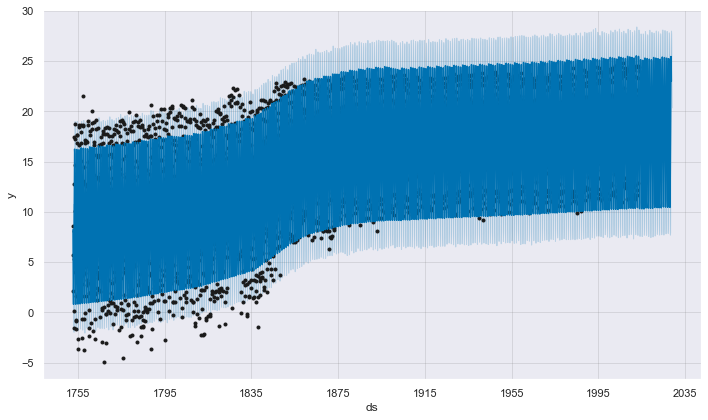

In [155]:
plot1Norte = mNorte.plot(forecastNorte)

### Gráfico predicciones del hemisferio sur 

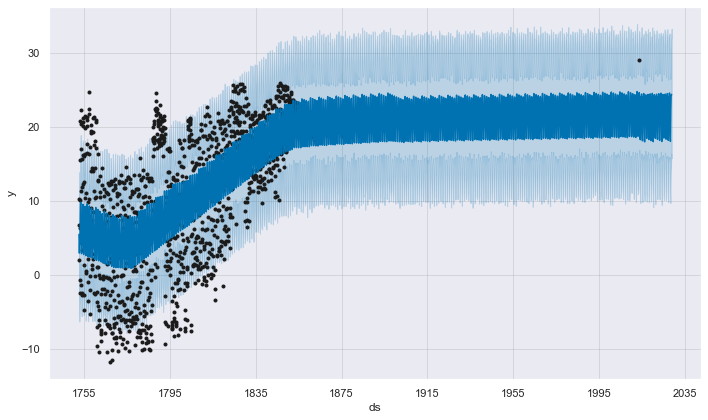

In [156]:
plot1Sur = mSur.plot(forecastSur)

### Predicción de componentes hemisferio norte

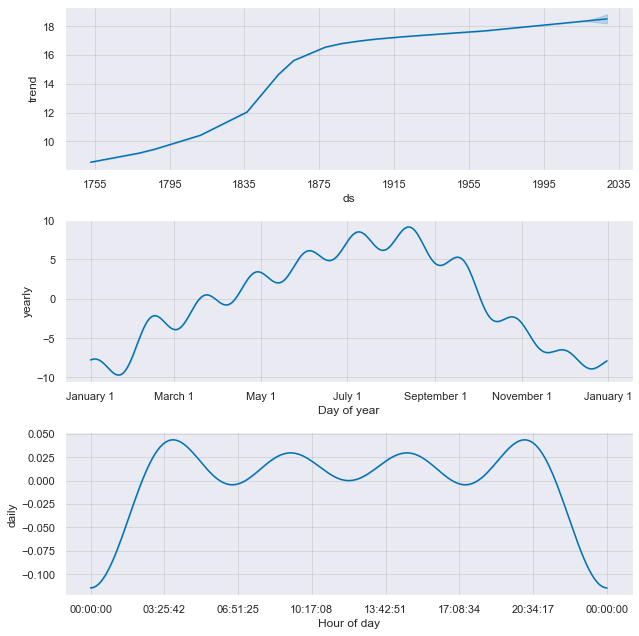

In [157]:
plotCompomentesNorte = mNorte.plot_components(forecastNorte)

### Predicción de componentes hemisferio sur

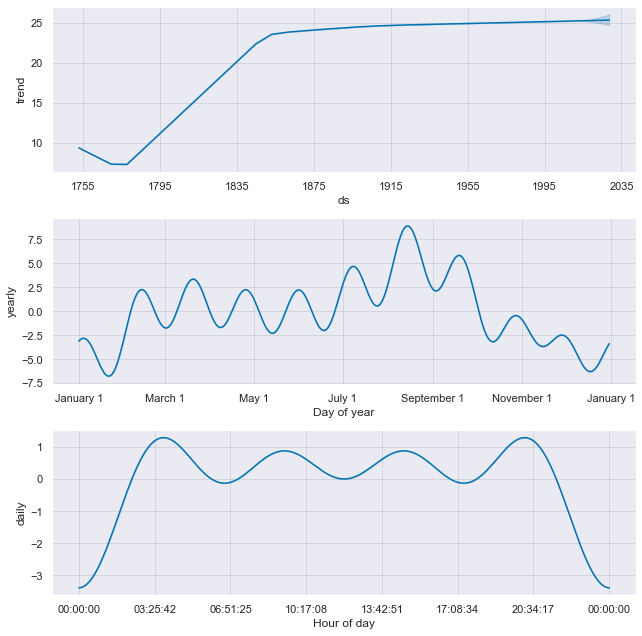

In [159]:
plotCompomentesSur = mSur.plot_components(forecastSur)